In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Pizza-Price.csv')

In [ ]:
df.head()

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,C,no,no,9,no,500
1,M,yes,yes,8,no,550
2,G,yes,no,9,no,600
3,K,yes,yes,8,no,600
4,A,yes,yes,12,no,650


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Restaurant      20 non-null     object
 1   Extra Cheeze    20 non-null     object
 2   Extra Mushroom  20 non-null     object
 3    Size by Inch   20 non-null     int64 
 4   Extra Spicy     20 non-null     object
 5   Price           20 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


In [ ]:
df.describe()

,Size by Inch,Price
count,20.000000,20.000000
mean,11.600000,727.500000
std,2.500526,130.257841
min,8.000000,500.000000
25%,9.000000,650.000000
50%,12.000000,700.000000
75%,12.750000,762.500000
max,15.000000,1000.000000


In [ ]:
df.isnull().sum()

,0
Restaurant,0
Extra Cheeze,0
Extra Mushroom,0
Size by Inch,0
Extra Spicy,0
Price,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Extra Cheeze']=label.fit_transform(df['Extra Cheeze'])
df['Extra Cheeze'].unique()

array([0, 1])

In [ ]:
df['Extra Mushroom']=label.fit_transform(df['Extra Mushroom'])
df['Extra Mushroom'].unique()

array([0, 1])

In [ ]:
df['Extra Spicy']=label.fit_transform(df['Extra Spicy'])
df['Extra Spicy'].unique()

array([0, 1])

In [ ]:
X=df.drop(columns=['Restaurant','Price'],axis=1)
y=df['Price']

In [ ]:
X

,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy
0,0,0,9,0
1,1,1,8,0
2,1,0,9,0
3,1,1,8,0
4,1,1,12,0
5,0,0,9,0
6,1,0,12,1
7,1,0,9,1
8,0,1,15,0
9,0,0,12,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor

In [ ]:

model_performance = {}

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_predict_lr = model_lr.predict(X_test)
r2_lr = r2_score(y_test, y_predict_lr)
mse_lr = mean_squared_error(y_test, y_predict_lr)
model_performance['LinearRegression'] = {'R2': r2_lr, 'MSE': mse_lr}
print(f"Linear Regression - R-squared: {r2_lr}, Mean Squared Error: {mse_lr}")
y_predict=model_lr.predict([[0,0,9,0]])
print(y_predict)

Linear Regression - R-squared: 0.6826950629680324, Mean Squared Error: 8874.622457612842
[600.64142678]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_predict_rf = model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_predict_rf)
mse_rf = mean_squared_error(y_test, y_predict_rf)
model_performance['RandomForestRegressor'] = {'R2': r2_rf, 'MSE': mse_rf}
print(f"RandomForestRegressor - R-squared: {r2_rf}, Mean Squared Error: {mse_rf}")
y_predict=model.predict(X_test)
print(y_predict)

RandomForestRegressor - R-squared: 0.5481303423529568, Mean Squared Error: 12638.22948731574
[650.98333333 860.01666667 938.23333333 630.375     ]


In [ ]:
# SVR
model_svr = SVR()
model_svr.fit(X_train, y_train)
y_predict_svr = model_svr.predict(X_test)
r2_svr = r2_score(y_test, y_predict_svr)
mse_svr = mean_squared_error(y_test, y_predict_svr)
model_performance['SVR'] = {'R2': r2_svr, 'MSE': mse_svr}
print(f"SVR - R-squared: {r2_svr}, Mean Squared Error: {mse_svr}")

y_predict=model.predict(X_test) # Pass X_test to the predict method
print(y_predict)

SVR - R-squared: -0.001240596515786896, Mean Squared Error: 28003.447933800915
[650.98333333 860.01666667 938.23333333 630.375     ]


In [ ]:

# DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_predict_dt = model_dt.predict(X_test)
r2_dt = r2_score(y_test, y_predict_dt)
mse_dt = mean_squared_error(y_test, y_predict_dt)
model_performance['DecisionTreeRegressor'] = {'R2': r2_dt, 'MSE': mse_dt}
print(f"DecisionTreeRegressor - R-squared: {r2_dt}, Mean Squared Error: {mse_dt}")


DecisionTreeRegressor - R-squared: 0.553072625698324, Mean Squared Error: 12500.0


[]

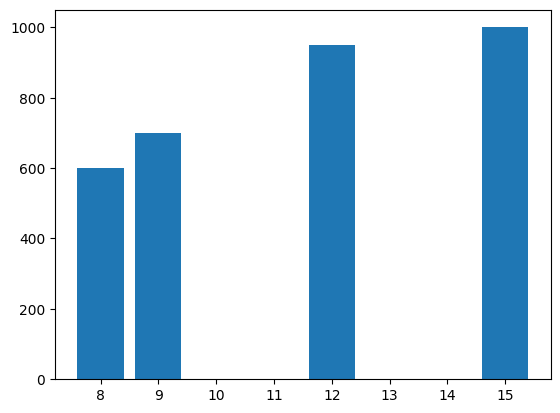

In [ ]:
x=df[' Size by Inch']
y=df['Price']
plt.bar(x,y)
plt.plot()

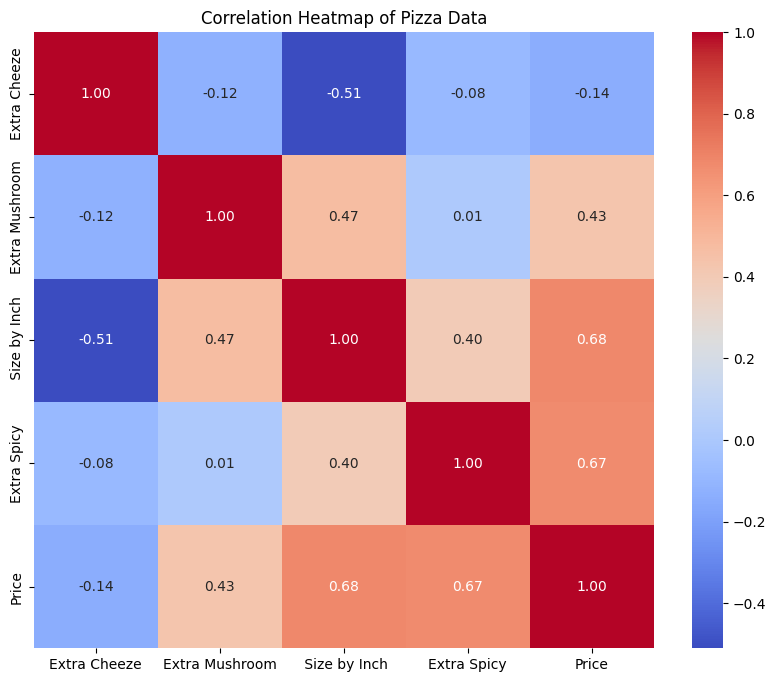

In [ ]:

correlation_matrix = df.drop(columns=['Restaurant']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Pizza Data')
plt.show()

In [ ]:

best_model_name = max(model_performance, key=lambda k: model_performance[k]['R2'])
print(f"\nBased on R-squared, the best model is: {best_model_name}")
print(f"Performance: R-squared = {model_performance[best_model_name]['R2']:.2f}, MSE = {model_performance[best_model_name]['MSE']:.2f}")




Based on R-squared, the best model is: LinearRegression
Performance: R-squared = 0.68, MSE = 8874.62


In [ ]:
#Based on the above R-Squared values from all the four models:
#1.Linear Regression
#2.SVR
#3.RandomForestRegressor
#4.DecisionTreeRegressor
#The best model for predciting the pizza price is Linear Regression .